In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A=np.load('fit_exercise.npy')

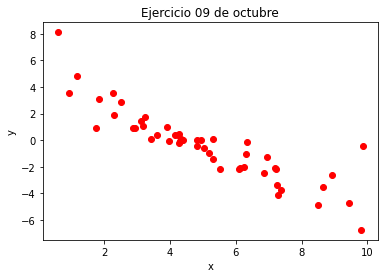

In [3]:
plt.plot(A[0],A[1], 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ejercicio 09 de octubre')
plt.show()

# Linear Last Square

In [4]:
ym=np.mean(A[1])
xm=np.mean(A[0])

a=(A[0]-xm) * (A[1]-ym)
a=a.sum()
b=(A[0]-xm)**2
b=b.sum()
beta1=a/b
beta0= ym - beta1*xm
ylls=beta1*A[0]+beta0

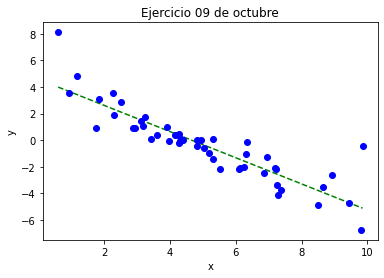

In [5]:
plt.plot(A[0],ylls,'g--')
plt.plot(A[0],A[1], 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ejercicio 09 de octubre')
plt.show()

# Minimum Chisq.

In [6]:
import scipy.optimize as opt
#A[0]-> x; A[1]->y, A[2]->error

x = A[0]
y = A[1]
erry = A[2]

# funcion modelo
def f(x, b0, b1):
    return b0 + b1*x

# función residual
def g(beta):
    return np.sum((y - f(x, *beta))**2/erry)
    
# comenzamos la optimización
#valores iniciales de a y b
beta_start = (0, 0)
#Función de minimizar de scipy 
beta_opt = opt.minimize(g, beta_start)
ych2=beta_opt.x[0]+A[0]*beta_opt.x[1]

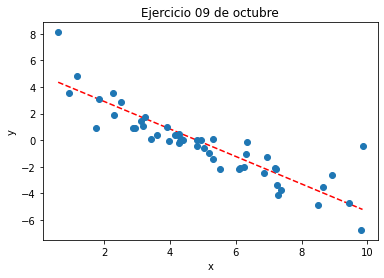

In [7]:
plt.plot(A[0],ych2,'r--')
plt.plot(A[0],A[1], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ejercicio 09 de octubre')
plt.show()

## Comparación entre los valores obtenidos con ambos métodos

In [8]:
beta0

4.5778593037533595

In [9]:
beta_opt.x[0]

4.972973129323891

In [10]:
beta1

-0.9821623517930425

In [11]:
beta_opt.x[1]

-1.031910129084329